In [10]:
# Loan Approval Prediction - Notebook 01: Data Exploration
# Updated for the user's dataset structure.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('data/raw/loan_data.csv')
print("Shape:", df.shape)
df.head()


Shape: (45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [11]:
# Rename columns to standardized names
rename_map = {
    'person_gender': 'Gender',
    'person_education': 'Education',
    'person_income': 'ApplicantIncome',
    'person_emp_exp': 'Employment_Experience',
    'person_home_ownership': 'Home_Ownership',
    'loan_amnt': 'LoanAmount',
    'loan_intent': 'Loan_Purpose',
    'loan_int_rate': 'Interest_Rate',
    'loan_percent_income': 'Loan_Income_Percent',
    'cb_person_cred_hist_length': 'Credit_History_Length',
    'credit_score': 'Credit_Score',
    'previous_loan_defaults_on_file': 'Previous_Default',
    'loan_status': 'Loan_Status'
}
df.rename(columns=rename_map, inplace=True)

print("Columns after renaming:")
print(df.columns.tolist())


Columns after renaming:
['person_age', 'Gender', 'Education', 'ApplicantIncome', 'Employment_Experience', 'Home_Ownership', 'LoanAmount', 'Loan_Purpose', 'Interest_Rate', 'Loan_Income_Percent', 'Credit_History_Length', 'Credit_Score', 'Previous_Default', 'Loan_Status']


In [12]:
# Check basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             45000 non-null  float64
 1   Gender                 45000 non-null  object 
 2   Education              45000 non-null  object 
 3   ApplicantIncome        45000 non-null  float64
 4   Employment_Experience  45000 non-null  int64  
 5   Home_Ownership         45000 non-null  object 
 6   LoanAmount             45000 non-null  float64
 7   Loan_Purpose           45000 non-null  object 
 8   Interest_Rate          45000 non-null  float64
 9   Loan_Income_Percent    45000 non-null  float64
 10  Credit_History_Length  45000 non-null  float64
 11  Credit_Score           45000 non-null  int64  
 12  Previous_Default       45000 non-null  object 
 13  Loan_Status            45000 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 4.8+ 

In [13]:
# Check descriptive statistics
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,45000.0,NaN,NaN,NaN,27.764178,6.045108,20.0,24.0,26.0,30.0,144.0
Gender,45000,2,male,24841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,45000,5,Bachelor,13399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,45000.0,NaN,NaN,NaN,80319.053222,80422.498632,8000.0,47204.0,67048.0,95789.25,7200766.0
Employment_Experience,45000.0,NaN,NaN,NaN,5.410333,6.063532,0.0,1.0,4.0,8.0,125.0
Home_Ownership,45000,4,RENT,23443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LoanAmount,45000.0,NaN,NaN,NaN,9583.157556,6314.886691,500.0,5000.0,8000.0,12237.25,35000.0
Loan_Purpose,45000,6,EDUCATION,9153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest_Rate,45000.0,NaN,NaN,NaN,11.006606,2.978808,5.42,8.59,11.01,12.99,20.0
Loan_Income_Percent,45000.0,NaN,NaN,NaN,0.139725,0.087212,0.0,0.07,0.12,0.19,0.66


In [14]:
# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing[missing > 0])


Missing values per column:
Series([], dtype: int64)


In [15]:
# Handle missing values and basic cleanup
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0, 1: 1, 0: 0})
df['Gender'] = df['Gender'].astype(str).str.title()
df['Previous_Default'] = df['Previous_Default'].map({'Y': 'Yes', 'N': 'No', 1: 'Yes', 0: 'No'})

df.fillna({
    'Gender': df['Gender'].mode()[0],
    'Education': df['Education'].mode()[0],
    'Home_Ownership': df['Home_Ownership'].mode()[0],
    'Loan_Purpose': df['Loan_Purpose'].mode()[0],
    'Interest_Rate': df['Interest_Rate'].median(),
    'Credit_Score': df['Credit_Score'].median(),
    'Credit_History_Length': df['Credit_History_Length'].median()
}, inplace=True)


In [16]:
# Verify missing values after imputation
df.isnull().sum().sum()


np.int64(45000)

In [17]:
# Feature engineering
df['Income_to_Loan_Ratio'] = df['ApplicantIncome'] / (df['LoanAmount'] + 1)
df['Age_Group'] = pd.cut(
    df['person_age'],
    bins=[18, 30, 40, 50, 60, 100],
    labels=['18-30', '31-40', '41-50', '51-60', '60+']
)
df['Credit_Rating'] = pd.cut(
    df['Credit_Score'],
    bins=[300, 600, 700, 800, 900],
    labels=['Poor', 'Fair', 'Good', 'Excellent']
)


In [18]:
# Display sample rows
df.head()


,person_age,Gender,Education,ApplicantIncome,Employment_Experience,Home_Ownership,LoanAmount,Loan_Purpose,Interest_Rate,Loan_Income_Percent,Credit_History_Length,Credit_Score,Previous_Default,Loan_Status,Income_to_Loan_Ratio,Age_Group,Credit_Rating
0,22.0,Female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,NaN,1,2.055598,18-30,Poor
1,21.0,Female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,NaN,0,12.269730,18-30,Poor
2,25.0,Female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,NaN,1,2.261043,18-30,Fair
3,23.0,Female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,NaN,1,2.278592,18-30,Fair
4,24.0,Male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,NaN,1,1.889517,18-30,Poor


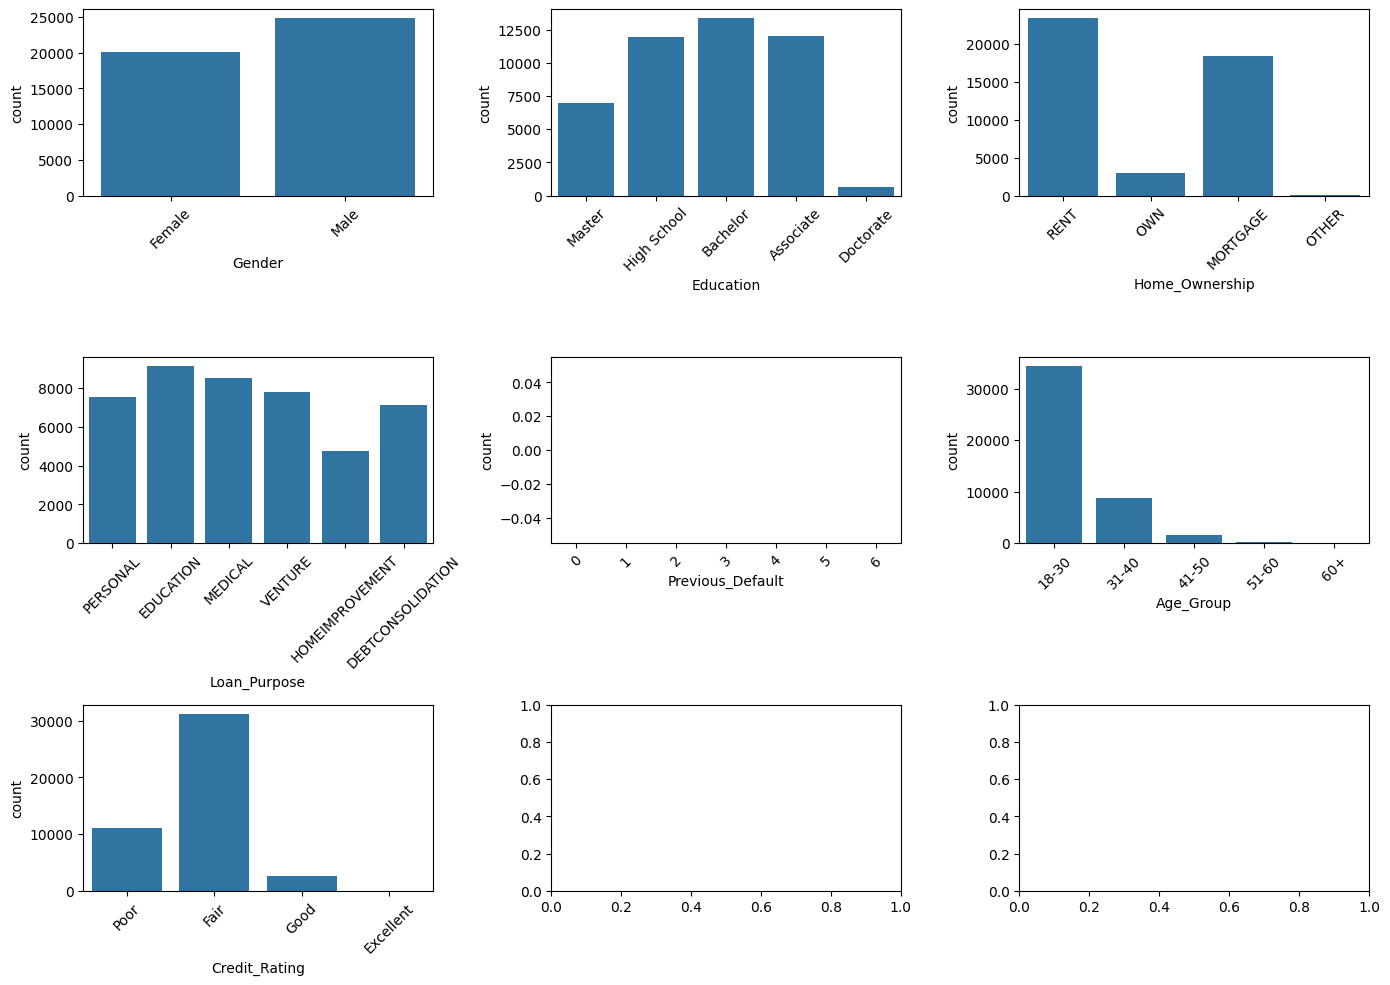

In [19]:
# Univariate analysis for categorical columns
cat_cols = ['Gender', 'Education', 'Home_Ownership', 'Loan_Purpose', 'Previous_Default', 'Age_Group', 'Credit_Rating']
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(cat_cols[:9]):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


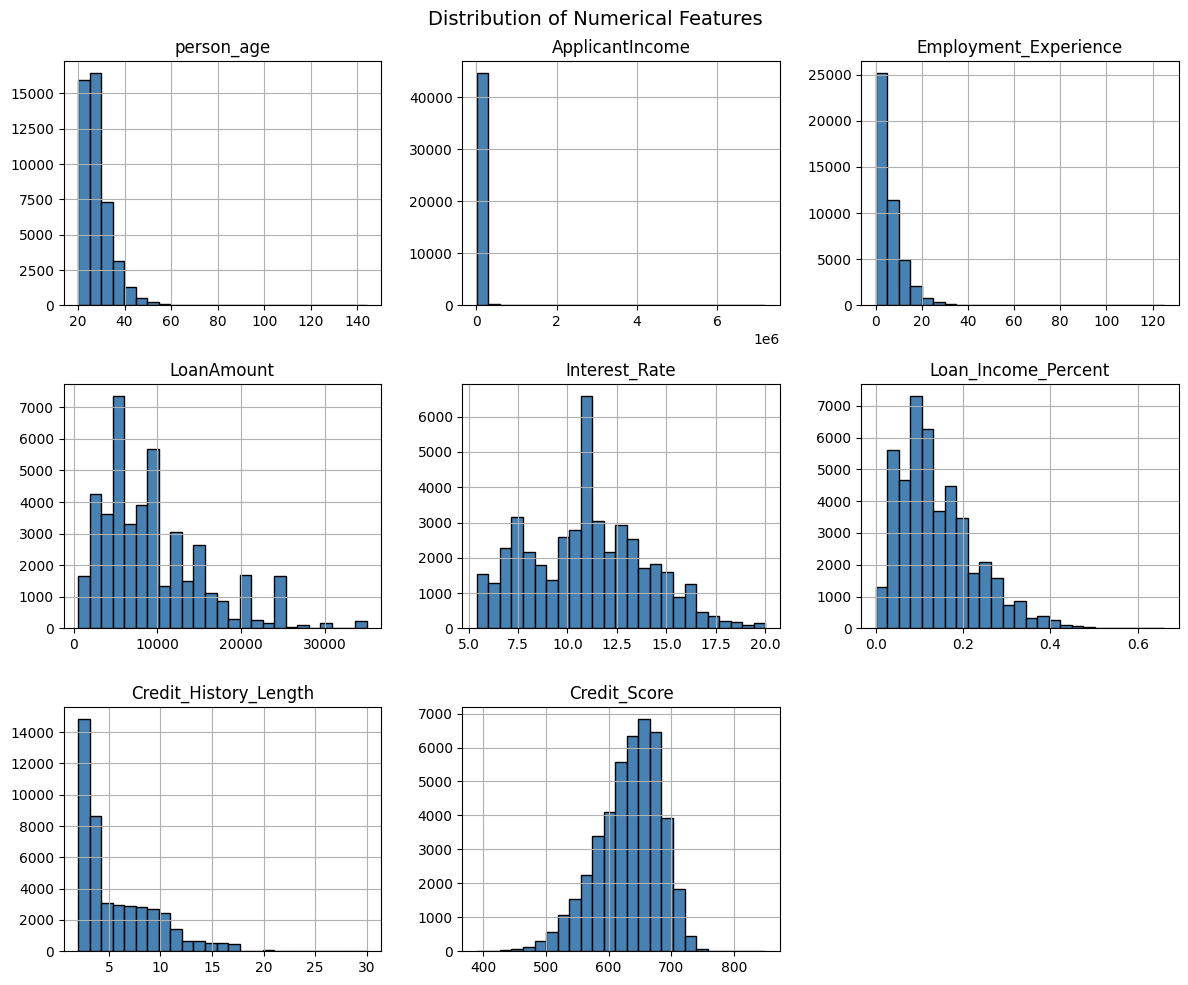

In [20]:
# Distribution of numeric columns
num_cols = ['person_age', 'ApplicantIncome', 'Employment_Experience', 'LoanAmount',
            'Interest_Rate', 'Loan_Income_Percent', 'Credit_History_Length', 'Credit_Score']

df[num_cols].hist(figsize=(12, 10), bins=25, color='steelblue', edgecolor='black')

plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()


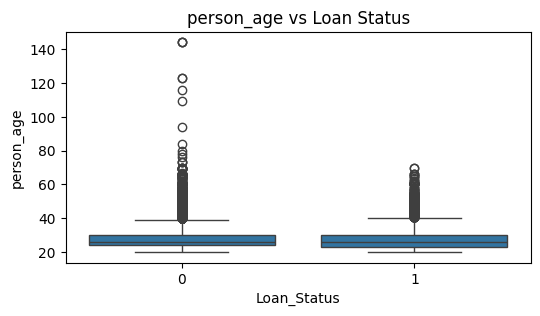

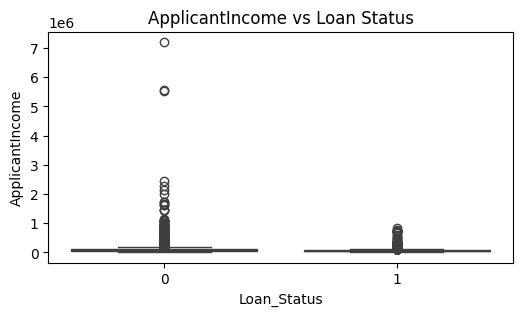

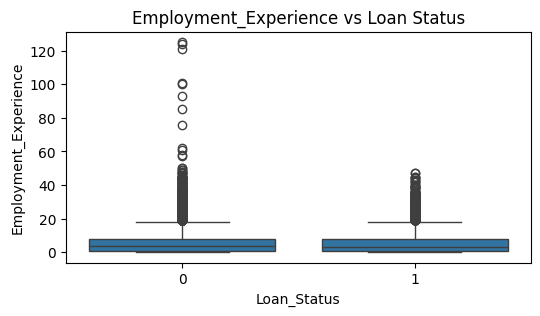

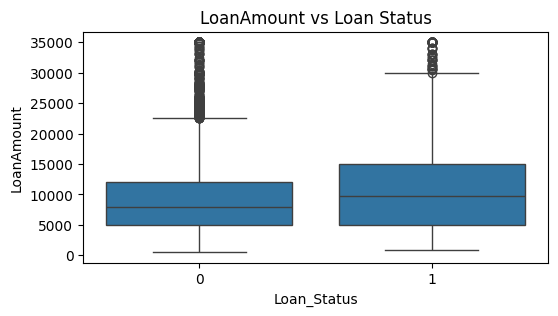

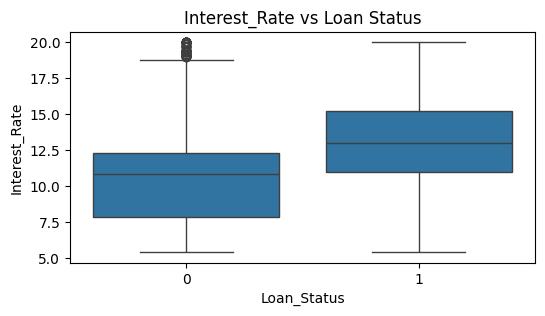

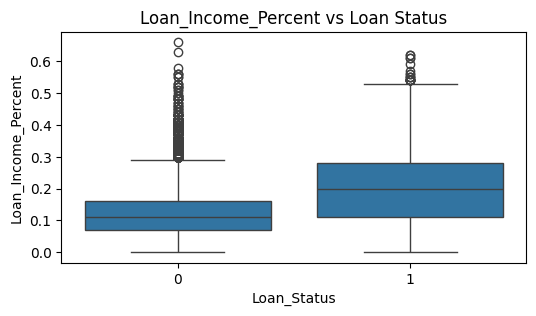

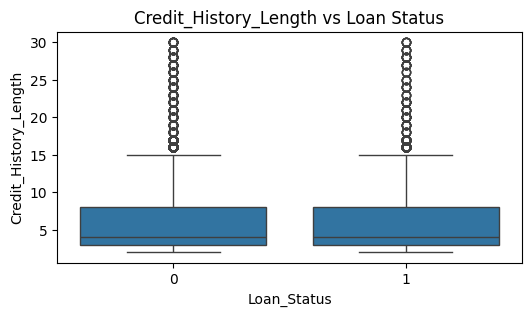

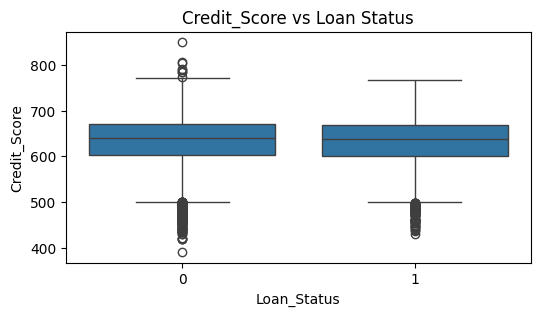

In [21]:
# Relationship between numeric variables and target
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f'{col} vs Loan Status')
    plt.show()


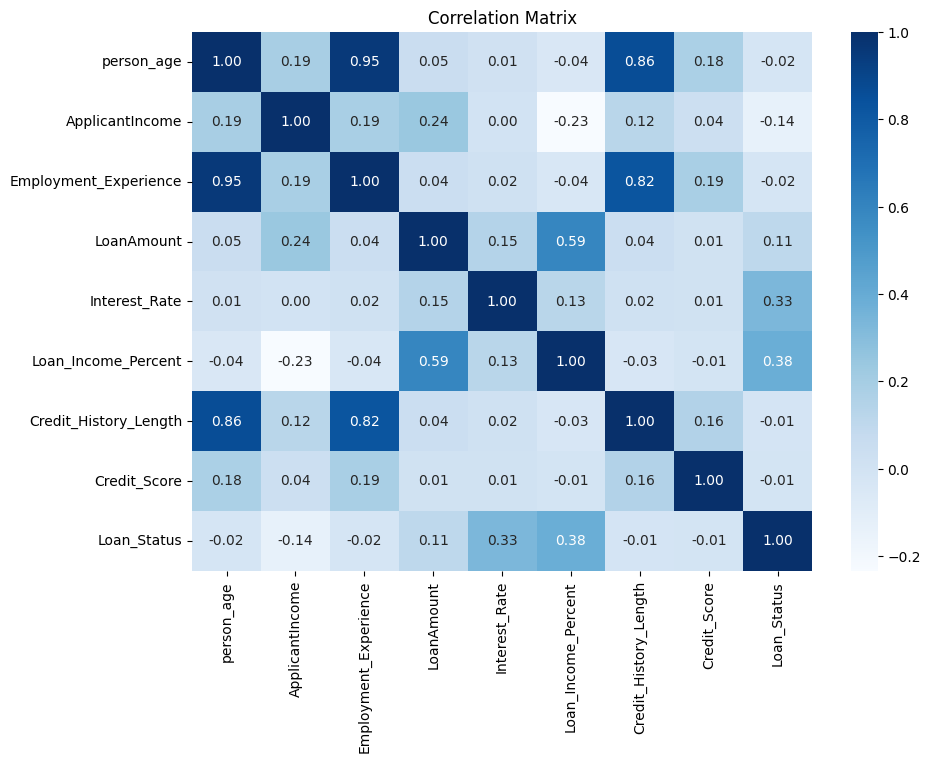

In [22]:
# Correlation matrix
plt.figure(figsize=(10, 7))
corr = df[num_cols + ['Loan_Status']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


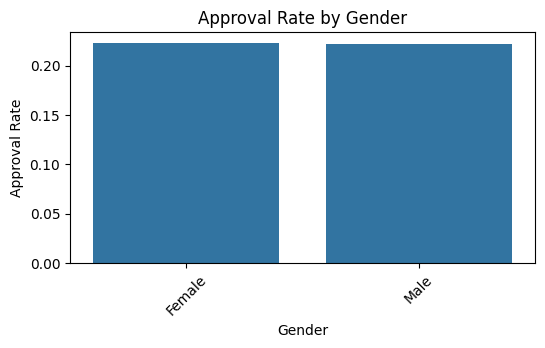

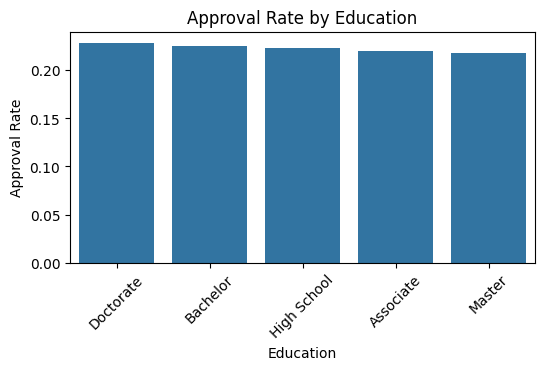

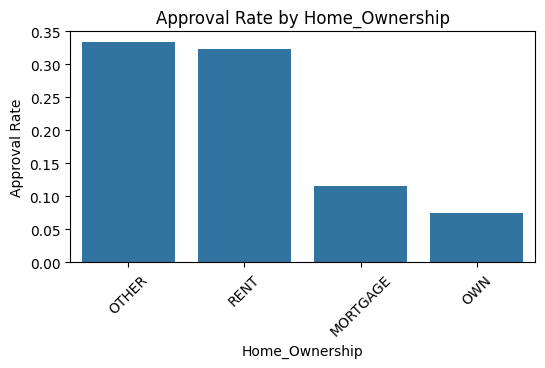

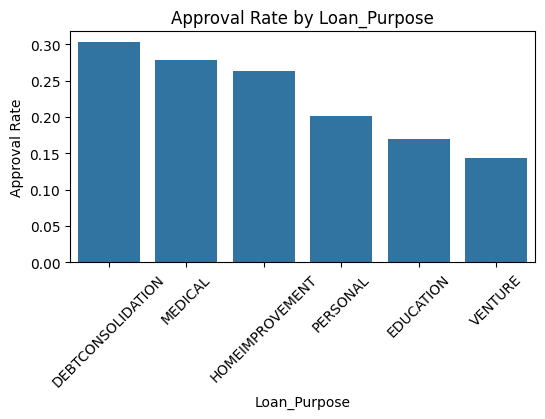

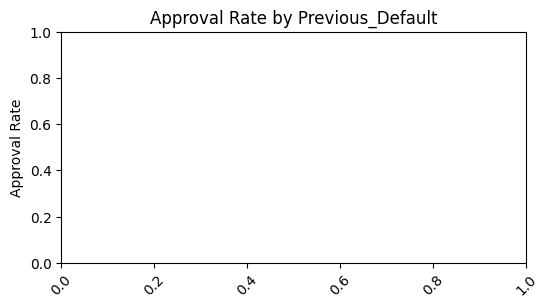

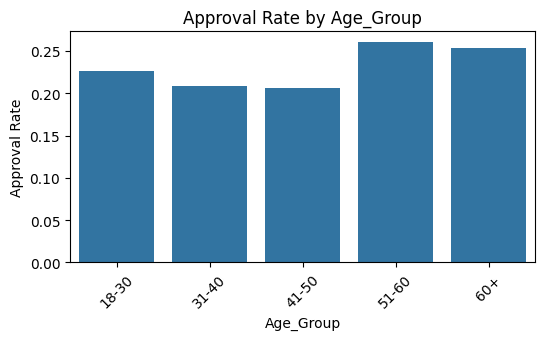

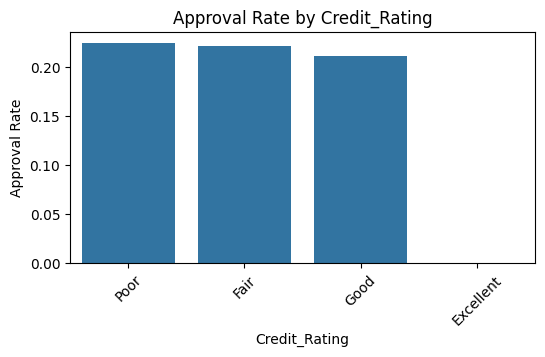

In [23]:
# Approval rate by categorical variables
for col in cat_cols:
    rate = df.groupby(col)['Loan_Status'].mean().sort_values(ascending=False)
    plt.figure(figsize=(6, 3))
    sns.barplot(x=rate.index, y=rate.values)
    plt.title(f'Approval Rate by {col}')
    plt.ylabel('Approval Rate')
    plt.xticks(rotation=45)
    plt.show()


In [25]:
# Save cleaned and processed data for model training
df.to_csv('data/processed/cleaned_loan_data.csv', index=False)
print("Cleaned data saved to data/processed/cleaned_loan_data.csv")


Cleaned data saved to data/processed/cleaned_loan_data.csv
